### KNN Regression

1) KNN Stands for K Nearest Neighbors<br>
2) KNN algorithm can be used for Regression as well as Classification<br>
3) <b>KNN Intuition </b> The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.<br>
4) KNN Regression works by finding the distances between a query(test data) and all the examples in the data(train data), selecting the specified number of examples (K) closest to the query. Then for the K closest data points it takes average of values for the target variables which is the predicion value.

### KNN Algorithm 

1) Load the data<br>
2) Initialize K to your chosen number of neighbors.<br>
3) For getting the predicted class, iterate from 1 to total number of training data points<br> 

a) Calculate the distance between test data and each row of training data. Use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Manhattan, etc.<br>
b) Sort the calculated distances in ascending order based on distance values<br>
c) Get top K rows from the sorted array<br>
d) Get the average of target variable for these K rows<br>
e) Return the computed average as the predicted continuous value<br>


#### Distance Metrics

1) <b>Eculidean Distance</b><br>
$ d((x1,y1)(x2,y2)) =  ((x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2})^{(1/2)} $

2) <b>Manhattan Distance</b><br>
$ d((x1,y1)(x2,y2)) =  |x_{2} - x_{1}| + |y_{2} - y_{1}| $

3) <b>Minkowski Distance</b><br>
$ d((x1,y1)(x2,y2)) =  ((|x_{2} - x_{1}|)^{p} + (|y_{2} - y_{1}|)^{p})^{(1/p)} $
where p is an integer

where<br>
(x1,y1) - coordinates fo the first data point<br>
(x2,y2) - coordinates of the second data point

#### Note
a) For p=2, Minkowski’s Distance equals Euclidean’s Distance <br>
b) For p=1, Minkowski’s Distance equals Manhattan Distance 

#### How to determine the optimum value of K

Optimium value of K can be determined by Cross validation techniques

#### Example

In [ ]:
import pandas as pd
# pandas is aliased as plt
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt

In [ ]:
data = {'height' : [5,5.11,5.6,5.9,4.8,5.8,5.3,5.8,5.5,5.6],
        'age' : [45,26,30,34,40,36,19,28,23,32],
        'weight' : [77,47,55,59,72,60,40,60,45,58]
       }

print(data)
print(type(data))

{'height': [5, 5.11, 5.6, 5.9, 4.8, 5.8, 5.3, 5.8, 5.5, 5.6], 'age': [45, 26, 30, 34, 40, 36, 19, 28, 23, 32], 'weight': [77, 47, 55, 59, 72, 60, 40, 60, 45, 58]}
<class 'dict'>


In [ ]:
df = pd.DataFrame(data)
df

,height,age,weight
0,5.00,45,77
1,5.11,26,47
2,5.60,30,55
3,5.90,34,59
4,4.80,40,72
5,5.80,36,60
6,5.30,19,40
7,5.80,28,60
8,5.50,23,45
9,5.60,32,58


In [ ]:
df.shape

(10, 3)

In [ ]:
df.isnull().sum()

height    0
age       0
weight    0
dtype: int64

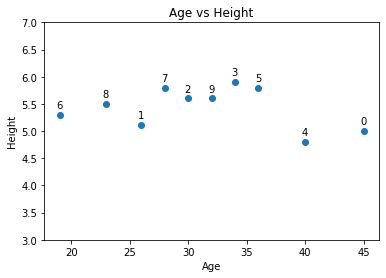

In [ ]:
labels = df.index  # labels = [0,1,2,3....,9]
plt.figure(figsize=(6, 4))
plt.scatter(df['age'],df['height'])
plt.title('Age vs Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.ylim(3,7)
for i, x, y in zip(labels, df['age'],df['height']):
      plt.annotate(s=i,xy=(x-0.3,y+0.12))
plt.show()

#### Predict the weight, given the following
1) Height = 5.5, Age=38

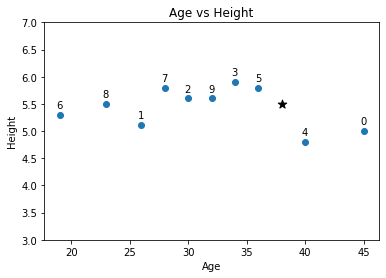

In [ ]:
labels = df.index
plt.figure(figsize=(6, 4))
plt.scatter(df['age'],df['height'])
plt.scatter(38,5.5,color='black',marker='*',s=80)
plt.title('Age vs Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.ylim(3,7)
for i, x, y in zip(labels, df['age'],df['height']):
    plt.annotate(s=i,xy=(x-0.3,y+0.12))  
plt.show()

#### Let K=3 (assumption)
<b>Eculidean Distance</b><br>
$ d((x1,y1)(x2,y2)) =  ((x_{2} - x_{1})^{2} + (y_{2} - y_{1})^{2})^{(1/2)} $

height=5.5, age=38

In [ ]:
df['dist']  = np.sqrt((df['height'] - 5.5)**2 + (df['age'] - 38)**2)
df

,height,age,weight,dist
0,5.00,45,77,7.017834
1,5.11,26,47,12.006336
2,5.60,30,55,8.000625
3,5.90,34,59,4.019950
4,4.80,40,72,2.118962
5,5.80,36,60,2.022375
6,5.30,19,40,19.001053
7,5.80,28,60,10.004499
8,5.50,23,45,15.000000
9,5.60,32,58,6.000833


In [ ]:
df.sort_values(by='dist')

,height,age,weight,dist
5,5.80,36,60,2.022375
4,4.80,40,72,2.118962
3,5.90,34,59,4.019950
9,5.60,32,58,6.000833
0,5.00,45,77,7.017834
2,5.60,30,55,8.000625
7,5.80,28,60,10.004499
1,5.11,26,47,12.006336
8,5.50,23,45,15.000000
6,5.30,19,40,19.001053


#### We can conclude that data points at index 5,4 and 3 are the K(3) nearest neighbors

In [ ]:
df.loc[[5,4,3],'weight']

5    60
4    72
3    59
Name: weight, dtype: int64

#### Predicted Weight for Height=5.5, age=38

In [ ]:
df.loc[[5,4,3],'weight'].mean()

63.666666666666664

### KNN on Chemical process Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ChemicalProcess.csv')
df.head()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1


In [ ]:
df.shape
# num of rows= 176, num of cols=58

(176, 58)

In [ ]:
df.columns

Index(['Yield', 'BiologicalMaterial01', 'BiologicalMaterial02',
       'BiologicalMaterial03', 'BiologicalMaterial04', 'BiologicalMaterial05',
       'BiologicalMaterial06', 'BiologicalMaterial07', 'BiologicalMaterial08',
       'BiologicalMaterial09', 'BiologicalMaterial10', 'BiologicalMaterial11',
       'BiologicalMaterial12', 'ManufacturingProcess01',
       'ManufacturingProcess02', 'ManufacturingProcess03',
       'ManufacturingProcess04', 'ManufacturingProcess05',
       'ManufacturingProcess06', 'ManufacturingProcess07',
       'ManufacturingProcess08', 'ManufacturingProcess09',
       'ManufacturingProcess10', 'ManufacturingProcess11',
       'ManufacturingProcess12', 'ManufacturingProcess13',
       'ManufacturingProcess14', 'ManufacturingProcess15',
       'ManufacturingProcess16', 'ManufacturingProcess17',
       'ManufacturingProcess18', 'ManufacturingProcess19',
       'ManufacturingProcess20', 'ManufacturingProcess21',
       'ManufacturingProcess22', 'ManufacturingProce

In [ ]:
df.dtypes

Yield                     float64
BiologicalMaterial01      float64
BiologicalMaterial02      float64
BiologicalMaterial03      float64
BiologicalMaterial04      float64
BiologicalMaterial05      float64
BiologicalMaterial06      float64
BiologicalMaterial07      float64
BiologicalMaterial08      float64
BiologicalMaterial09      float64
BiologicalMaterial10      float64
BiologicalMaterial11      float64
BiologicalMaterial12      float64
ManufacturingProcess01    float64
ManufacturingProcess02    float64
ManufacturingProcess03    float64
ManufacturingProcess04    float64
ManufacturingProcess05    float64
ManufacturingProcess06    float64
ManufacturingProcess07    float64
ManufacturingProcess08    float64
ManufacturingProcess09    float64
ManufacturingProcess10    float64
ManufacturingProcess11    float64
ManufacturingProcess12    float64
ManufacturingProcess13    float64
ManufacturingProcess14    float64
ManufacturingProcess15      int64
ManufacturingProcess16      int64
ManufacturingP

### Handling Null Values

In [ ]:
df.isnull().sum()

Yield                      0
BiologicalMaterial01       0
BiologicalMaterial02       0
BiologicalMaterial03       0
BiologicalMaterial04       0
BiologicalMaterial05       0
BiologicalMaterial06       0
BiologicalMaterial07       0
BiologicalMaterial08       0
BiologicalMaterial09       0
BiologicalMaterial10       0
BiologicalMaterial11       0
BiologicalMaterial12       0
ManufacturingProcess01     1
ManufacturingProcess02     3
ManufacturingProcess03    15
ManufacturingProcess04     1
ManufacturingProcess05     1
ManufacturingProcess06     2
ManufacturingProcess07     1
ManufacturingProcess08     1
ManufacturingProcess09     0
ManufacturingProcess10     9
ManufacturingProcess11    10
ManufacturingProcess12     1
ManufacturingProcess13     0
ManufacturingProcess14     1
ManufacturingProcess15     0
ManufacturingProcess16     0
ManufacturingProcess17     0
ManufacturingProcess18     0
ManufacturingProcess19     0
ManufacturingProcess20     0
ManufacturingProcess21     0
ManufacturingP

#### Handling Null Values

In [ ]:
# nv = null value
nv = df.isnull().sum()
nv = nv[nv>0]
nv

ManufacturingProcess01     1
ManufacturingProcess02     3
ManufacturingProcess03    15
ManufacturingProcess04     1
ManufacturingProcess05     1
ManufacturingProcess06     2
ManufacturingProcess07     1
ManufacturingProcess08     1
ManufacturingProcess10     9
ManufacturingProcess11    10
ManufacturingProcess12     1
ManufacturingProcess14     1
ManufacturingProcess22     1
ManufacturingProcess23     1
ManufacturingProcess24     1
ManufacturingProcess25     5
ManufacturingProcess26     5
ManufacturingProcess27     5
ManufacturingProcess28     5
ManufacturingProcess29     5
ManufacturingProcess30     5
ManufacturingProcess31     5
ManufacturingProcess33     5
ManufacturingProcess34     5
ManufacturingProcess35     5
ManufacturingProcess36     5
ManufacturingProcess40     1
ManufacturingProcess41     1
dtype: int64

In [ ]:
nv.index

Index(['ManufacturingProcess01', 'ManufacturingProcess02',
       'ManufacturingProcess03', 'ManufacturingProcess04',
       'ManufacturingProcess05', 'ManufacturingProcess06',
       'ManufacturingProcess07', 'ManufacturingProcess08',
       'ManufacturingProcess10', 'ManufacturingProcess11',
       'ManufacturingProcess12', 'ManufacturingProcess14',
       'ManufacturingProcess22', 'ManufacturingProcess23',
       'ManufacturingProcess24', 'ManufacturingProcess25',
       'ManufacturingProcess26', 'ManufacturingProcess27',
       'ManufacturingProcess28', 'ManufacturingProcess29',
       'ManufacturingProcess30', 'ManufacturingProcess31',
       'ManufacturingProcess33', 'ManufacturingProcess34',
       'ManufacturingProcess35', 'ManufacturingProcess36',
       'ManufacturingProcess40', 'ManufacturingProcess41'],
      dtype='object')

In [ ]:
# Impute Null values
def mean_impute(col):
    df.fillna(df[col].mean(),inplace=True)

In [ ]:
for i in nv.index:
    mean_impute(i)

In [ ]:
nv = df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

#### Correlation

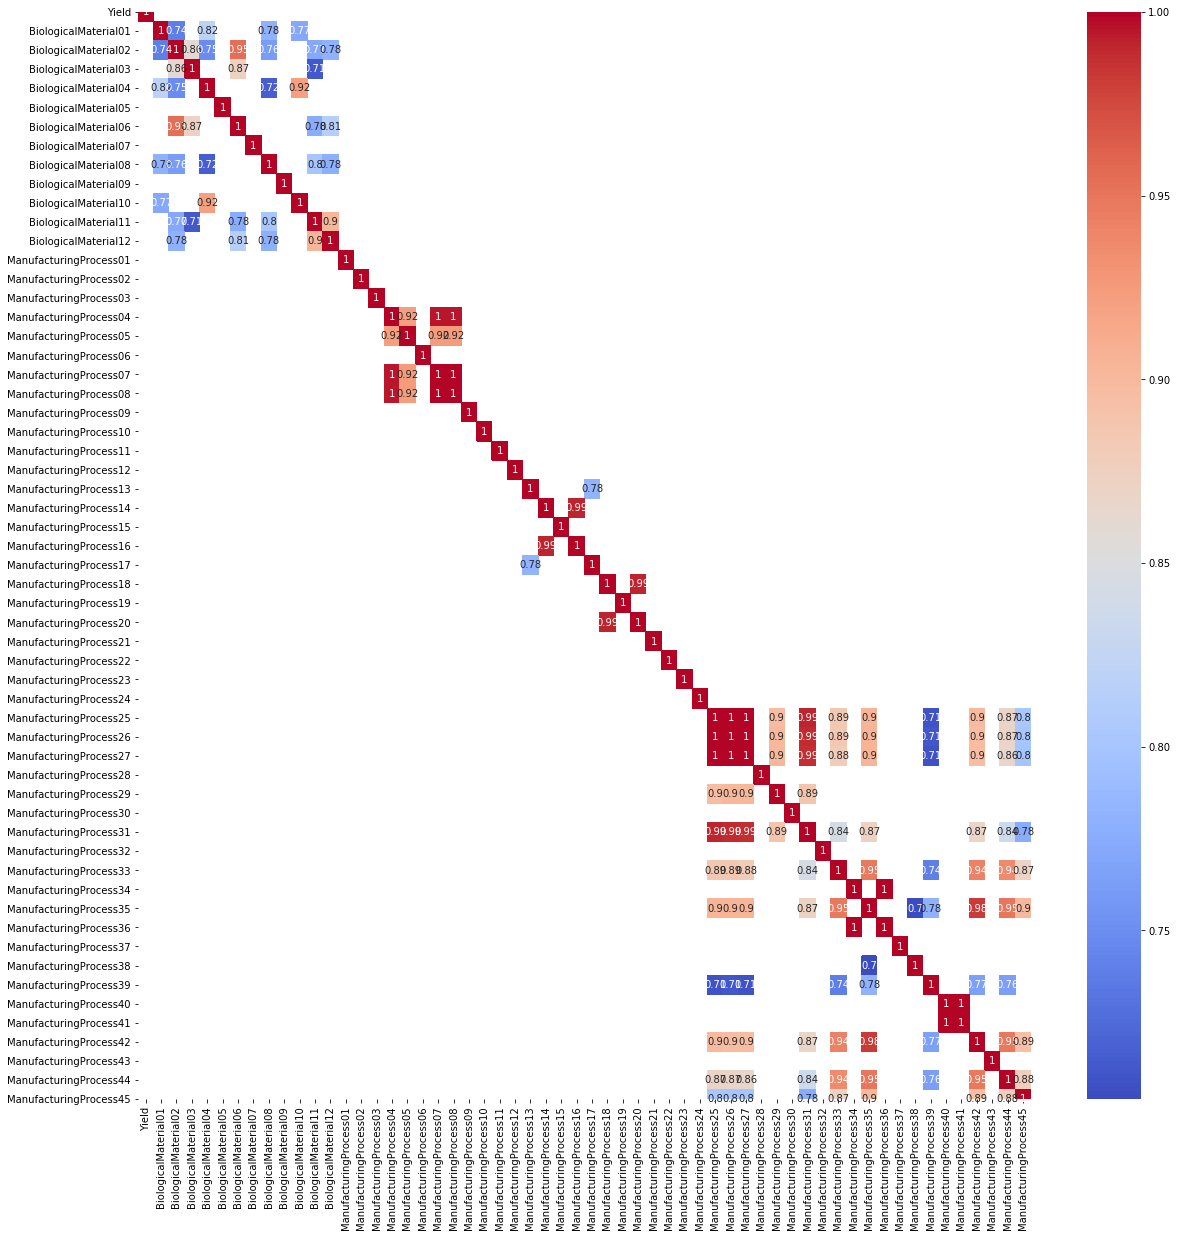

In [ ]:
corr = df.corr()
corr = corr[corr>=0.7]
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#### Selecting x and y as independent and Dependent Features

In [ ]:
x = df.drop('Yield',axis=1)
y = df['Yield']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(176, 57)
(176,)


#### Splitting data into train and Test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
176*.30

52.8

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=35)
print(x_train.shape) # (123, 57)
print(x_test.shape)  # (53, 57)
print(y_train.shape) # (123)
print(y_test.shape)  # (53)

(123, 57)
(53, 57)
(123,)
(53,)


In [ ]:
print(type(x_train),type(x_test))
print(type(y_train),type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [ ]:
x_train.head()

,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,BiologicalMaterial10,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
27,6.86,55.66,63.43,12.53,20.39,48.94,100.0,16.71,11.94,3.07,...,0.021000,0.9,3,7.4,0.0,0.0,11.6,1.3,1.7,2.2
6,7.48,64.47,72.41,13.82,17.71,54.45,100.0,18.72,12.95,3.04,...,0.019000,0.8,2,7.3,0.0,0.0,11.7,0.7,2.0,2.2
40,6.60,58.80,71.17,12.40,22.14,52.24,100.0,17.21,12.77,2.58,...,0.019000,0.0,2,7.2,0.0,0.0,10.9,1.0,1.9,2.2
128,6.23,52.95,66.71,12.75,16.31,45.84,100.0,16.70,12.75,2.98,...,0.019000,0.4,2,7.0,0.0,0.0,11.7,0.5,2.0,2.2
175,7.53,58.36,69.25,14.35,20.57,51.31,100.0,17.87,12.77,3.55,...,11.207429,0.9,0,0.0,0.0,0.0,0.0,0.6,0.0,0.0


In [ ]:
y_train.head()

27     36.12
6      43.12
40     41.47
128    42.73
175    39.49
Name: Yield, dtype: float64

#### Creating a function to generate Regression Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def reg_eval_metrics(ytest, ypred): 
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, ypred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

def train_test_scr(model):
    print('Training Score',model.score(x_train,y_train))  # R2 score for Training data
    print('Testing Score',model.score(x_test,y_test))     # R2 score for test data

### KNNRegression

#### Import KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#### Applying the KNN Reg Model

In [ ]:
m1 = KNeighborsRegressor(n_neighbors=11)
m1.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

#### Computing Training an Testing R2 Score

In [ ]:
train_test_scr(m1)

Training Score 0.34066834501594034
Testing Score 0.4009475916869524


#### Computing the Model Predictions

In [ ]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[39.32272727 39.94090909 39.98181818 39.45181818 39.61636364 41.50272727
 38.58272727 38.99181818 40.34454545 40.64       39.66454545 39.43818182
 39.77727273 41.58818182 39.26818182 40.82545455 39.92545455 40.00272727
 40.26090909 41.30181818 41.22727273 37.97818182 41.74818182 40.76363636
 38.52272727 39.91727273 39.69       40.00909091 40.07818182 39.63454545
 39.85545455 39.76454545 40.60454545 40.76636364 39.78818182 38.03727273
 39.80727273 40.68636364 39.51727273 39.57909091 38.45       40.51545455
 38.87545455 40.22636364 38.90090909 39.70363636 39.21636364 39.89454545
 39.92       39.43       41.32909091 40.56545455 40.95545455]


#### Computing Regression Evaluation Metrics

In [ ]:
print(type(y_test))
print(type(ypred_m1))
print(y_test.shape)
print(ypred_m1.shape)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(53,)
(53,)


In [ ]:
reg_eval_metrics(y_test, ypred_m1)

MAE: 0.9653344768439107
MSE: 1.5944099953220026
RMSE: 1.2626994873373485
R2 Score: 0.4009475916869524


In [ ]:
train_test_scr(m1)

Training Score 0.34066834501594034
Testing Score 0.4009475916869524
